<a href="https://colab.research.google.com/github/ManasviAtGitHub/Algorithms-for-Optimization/blob/main/Working_with_Julia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.6.0" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Success! Please reload this page and jump to the next section."
fi

Installing Julia 1.6.0 on the current Colab Runtime...
2021-10-21 15:58:28 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.6/julia-1.6.0-linux-x86_64.tar.gz [112838927/112838927] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing Julia package Plots...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.6

Success! Please reload this page and jump to the next section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [ ]:
versioninfo()

Julia Version 1.6.0
Commit f9720dc2eb (2021-03-24 12:55 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.30GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, haswell)
Environment:
  JULIA_NUM_THREADS = 2


In [ ]:
using BenchmarkTools

M = rand(2048, 2048)
@benchmark M^2

BenchmarkTools.Trial: 10 samples with 1 evaluation.
 Range (min … max):  490.062 ms … 608.362 ms  ┊ GC (min … max): 0.00% … 17.98%
 Time  (median):     503.244 ms               ┊ GC (median):    0.09%
 Time  (mean ± σ):   513.190 ms ±  34.847 ms  ┊ GC (mean ± σ):  2.63% ±  5.65%

  █ ▁ ▁ ▁▁  ▁▁   ▁                                            ▁  
  █▁█▁█▁██▁▁██▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  490 ms           Histogram: frequency by time          608 ms <

 Memory estimate: 32.00 MiB, allocs estimate: 2.

In [ ]:
if ENV["COLAB_GPU"] == "1"
    using CUDA

    M_gpu = cu(M)
    @benchmark CUDA.@sync M_gpu^2
else
    println("No GPU found.")
end

BenchmarkTools.Trial: 533 samples with 1 evaluation.
 Range (min … max):  6.522 ms … 288.703 ms  ┊ GC (min … max): 0.00% … 1.65%
 Time  (median):     8.003 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   9.371 ms ±  20.263 ms  ┊ GC (mean ± σ):  0.29% ± 0.13%

  ▁     ▅             ▅ ▄▄  ▂█ ▂▂                              
  █▅▃▁▁▄█▇▃▂▅▅▇▃▃▃▃▅▅██▅██▇▄██▇██▄▃▃▂▁▁▁▂▃▁▁▂▁▁▁▁▂▁▁▁▁▁▂▁▁▁▁▂ ▃
  6.52 ms         Histogram: frequency by time        10.4 ms <

 Memory estimate: 59.45 KiB, allocs estimate: 1904.

# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />

## How to print

In Julia we usually use `println()` to print

In [ ]:
println("I'm excited to learn Julia!")

I'm excited to learn Julia!


## How to assign variables

All we need is a variable name, value, and an equal's sign!<br>
Julia will figure out types for us.

In [ ]:
my_answer = 42
typeof(my_answer)

Int64

In [ ]:
my_pi = 3.14159
typeof(my_pi)

Float64

To type a smiley cat, use tab completion to select the emoji name and then tab again

In [ ]:
# \:smi + <tab> --> select with down arrow + <enter> ---> <tab> + <enter> to complete

In [ ]:
😺 = "smiley cat!"
typeof(😺)

String

In [ ]:
안녕하세요 = "Hello"
안녕하세요

"Hello"

In [ ]:
typeof(안녕하세요)

String

In [ ]:
😺 = 1

1

In [ ]:
😀 = 0
😞 = -1

-1

In [ ]:
😺 + 😞 == 😀

true

## Syntax for basic math

In [ ]:
sum = 3 + 7

10

In [ ]:
difference = 10 - 3

7

In [ ]:
product = 20 * 5

100

In [ ]:
quotient = 100 / 10

10.0

In [ ]:
power = 10 ^ 2

100

In [ ]:
modulus = 101 % 2

1

## Parse String to Int

In [ ]:
parse(Int64, "1")

1

## How to get a string

Enclose your characters in " " or """ """!

In [ ]:
s1 = "I am a string."

"I am a string."

In [ ]:
s2 = """I am also a string. """

"I am also a string. "

There are a couple functional differences between strings enclosed in single and triple quotes. <br>
One difference is that, in the latter case, you can use quotation marks within your string.

In [ ]:
"Here, we get an "error" because it's ambiguous where this string ends "

LoadError: ignored

In [ ]:
"""Look, Mom, no "errors"!!! """

"Look, Mom, no \"errors\"!!! "

Note that ' ' define a character, but NOT a string!

In [ ]:
typeof('a')

Char

In [ ]:
'We will get an error here'

LoadError: ignored

## String interpolation

We can use the $ sign to insert existing variables into a string and to evaluate expressions within a string. <br>
Below is an example that contains some highly sensitive personal information.

In [ ]:
name = "Jane"
num_fingers = 10
num_toes = 10

10

In [ ]:
println("Hello, my name is $name.")
println("I have $num_fingers fingers and $num_toes toes.")

Hello, my name is Jane.
I have 10 fingers and 10 toes.


In [ ]:
 println("That is $(num_fingers + num_toes) digits in all!!")

That is 20 digits in all!!


## String concatenation

Below are three ways we can concatenate strings! <br><br>
The first way is to use the `string()` function. <br>
`string()` converts non-string inputs to strings.

In [ ]:
s3 = "How many cats ";
s4 = "is too many cats?";
😺 = 10

10

In [ ]:
string(s3, s4)

"How many cats is too many cats?"

In [ ]:
string("I don't know, but ", 😺, " is too few.")

"I don't know, but 10 is too few."

We can also use `*` for concatenation!

In [ ]:
s3*s4

"How many cats is too many cats?"

# Data structures

Once we start working with many pieces of data at once, it will be convenient for us to store data in structures like arrays or dictionaries (rather than just relying on variables).<br>

Types of data structures covered:
1. Tuples
2. Dictionaries
3. Arrays

<br>
As an overview, tuples and arrays are both ordered sequences of elements (so we can index into them). Dictionaries and arrays are both mutable.
We'll explain this more below!

## Tuples

We can create a tuple by enclosing an ordered collection of elements in `( )`.

Syntax: <br>
```julia
(item1, item2, ...)```

In [ ]:
myfavoriteanimals = ("penguins", "cats", "sugargliders")

("penguins", "cats", "sugargliders")

We can index into this tuple,

In [ ]:
myfavoriteanimals[1]

"penguins"

but since tuples are immutable, we can't update it

In [ ]:
myfavoriteanimals[1] = "otters"

LoadError: ignored

## Now in 1.0: NamedTuples

As you might guess, `NamedTuple`s are just like `Tuple`s except that each element additionally has a name! They have a special syntax using `=` inside a tuple:

```julia
(name1 = item1, name2 = item2, ...)
```

In [ ]:
myfavoriteanimals = (bird = "penguins", mammal = "cats", marsupial = "sugargliders")

(bird = "penguins", mammal = "cats", marsupial = "sugargliders")

Like regular `Tuples`, `NamedTuples` are ordered, so we can retrieve their elements via indexing:

In [ ]:
myfavoriteanimals[1]

"penguins"

They also add the special ability to access values by their name:

In [ ]:
myfavoriteanimals.bird

"penguins"

## Dictionaries

If we have sets of data related to one another, we may choose to store that data in a dictionary. We can create a dictionary using the `Dict()` function, which we can initialize as an empty dictionary or one storing key, value pairs.

Syntax:
```julia
Dict(key1 => value1, key2 => value2, ...)```

A good example is a contacts list, where we associate names with phone numbers.

In [ ]:
myphonebook = Dict("Jenny" => "867-5309", "Ghostbusters" => "555-2368")

Dict{String, String} with 2 entries:
  "Jenny"        => "867-5309"
  "Ghostbusters" => "555-2368"

In this example, each name and number is a "key" and "value" pair. We can grab Jenny's number (a value) using the associated key

In [ ]:
myphonebook["Jenny"]

"867-5309"

We can add another entry to this dictionary as follows

In [ ]:
myphonebook["Kramer"] = "555-FILK"

"555-FILK"

Let's check what our phonebook looks like now...

In [ ]:
myphonebook

Dict{String, String} with 3 entries:
  "Jenny"        => "867-5309"
  "Kramer"       => "555-FILK"
  "Ghostbusters" => "555-2368"

We can delete Kramer from our contact list - and simultaneously grab his number - by using `pop!`

In [ ]:
pop!(myphonebook, "Kramer")

"555-FILK"

In [ ]:
myphonebook

Dict{String, String} with 2 entries:
  "Jenny"        => "867-5309"
  "Ghostbusters" => "555-2368"

Unlike tuples and arrays, dictionaries are not ordered. So, we can't index into them.

In [ ]:
myphonebook[1]

LoadError: ignored

In the example above, `julia` thinks you're trying to access a value associated with the key `1`.

## Arrays

Unlike tuples, arrays are mutable. Unlike dictionaries, arrays contain ordered collections. <br>
We can create an array by enclosing this collection in `[ ]`.

Syntax: <br>
```julia
[item1, item2, ...]```


For example, we might create an array to keep track of my friends

In [ ]:
myfriends = ["Ted", "Robyn", "Barney", "Lily", "Marshall"]

5-element Vector{String}:
 "Ted"
 "Robyn"
 "Barney"
 "Lily"
 "Marshall"

The `1` in `Array{String,1}` means this is a one dimensional vector.  An `Array{String,2}` would be a 2d matrix, etc.  The `String` is the type of each element.

or to store a sequence of numbers

In [ ]:
fibonacci = [1, 1, 2, 3, 5, 8, 13]

7-element Vector{Int64}:
  1
  1
  2
  3
  5
  8
 13

In [ ]:
mixture = [1, 1, 2, 3, "Ted", "Robyn"]

6-element Vector{Any}:
 1
 1
 2
 3
  "Ted"
  "Robyn"

Once we have an array, we can grab individual pieces of data from inside that array by indexing into the array. For example, if we want the third friend listed in `myfriends`, we write

In [ ]:
myfriends[3]

"Barney"

We can use indexing to edit an existing element of an array

In [ ]:
myfriends[3] = "Baby Bop"

"Baby Bop"

Yes, Julia is 1-based indexing, not 0-based like Python.  Wars are faught over lesser issues. I have a friend with the wisdom of Solomon who proposes settling this once and for all with ½ 😃

We can also edit the array by using the `push!` and `pop!` functions. `push!` adds an element to the end of an array and `pop!` removes the last element of an array.

We can add another number to our fibonnaci sequence

In [ ]:
push!(fibonacci, 21)

8-element Vector{Int64}:
  1
  1
  2
  3
  5
  8
 13
 21

and then remove it

In [ ]:
pop!(fibonacci)

21

In [ ]:
fibonacci

7-element Vector{Int64}:
  1
  1
  2
  3
  5
  8
 13

So far I've given examples of only 1D arrays of scalars, but arrays can have an arbitrary number of dimensions and can also store other arrays. 
<br><br>
For example, the following are arrays of arrays:

In [ ]:
favorites = [["koobideh", "chocolate", "eggs"],["penguins", "cats", "sugargliders"]]

2-element Vector{Vector{String}}:
 ["koobideh", "chocolate", "eggs"]
 ["penguins", "cats", "sugargliders"]

In [ ]:
numbers = [[1, 2, 3], [4, 5], [6, 7, 8, 9]]

3-element Vector{Vector{Int64}}:
 [1, 2, 3]
 [4, 5]
 [6, 7, 8, 9]

Below are examples of 2D and 3D arrays populated with random values.

In [ ]:
rand(4, 3)

4×3 Matrix{Float64}:
 0.752171  0.784128  0.250321
 0.185609  0.514436  0.881502
 0.680641  0.935007  0.212134
 0.516624  0.745813  0.770432

In [ ]:
rand(4, 3, 2)

4×3×2 Array{Float64, 3}:
[:, :, 1] =
 0.491193  0.908523  0.00888137
 0.681418  0.725537  0.373102
 0.367523  0.791823  0.139358
 0.440783  0.36089   0.500662

[:, :, 2] =
 0.883458  0.524976  0.972741
 0.442204  0.757262  0.477659
 0.257799  0.876198  0.968651
 0.70955   0.620307  0.598375

Be careful when you want to copy arrays!

In [ ]:
fibonacci

7-element Vector{Int64}:
  1
  1
  2
  3
  5
  8
 13

In [ ]:
somenumbers = fibonacci

7-element Vector{Int64}:
  1
  1
  2
  3
  5
  8
 13

In [ ]:
somenumbers[1] = 404

404

In [ ]:
fibonacci

7-element Vector{Int64}:
 404
   1
   2
   3
   5
   8
  13

Editing `somenumbers` caused `fibonacci` to get updated as well!

In the above example, we didn't actually make a copy of `fibonacci`. We just created a new way to access the entries in the array bound to `fibonacci`.

If we'd like to make a copy of the array bound to `fibonacci`, we can use the `copy` function.

In [ ]:
# First, restore fibonacci
fibonacci[1] = 1
fibonacci

7-element Vector{Int64}:
  1
  1
  2
  3
  5
  8
 13

In [ ]:
somemorenumbers = copy(fibonacci)

7-element Vector{Int64}:
  1
  1
  2
  3
  5
  8
 13

In [ ]:
somemorenumbers[1] = 404

404

In [ ]:
fibonacci

7-element Vector{Int64}:
  1
  1
  2
  3
  5
  8
 13

In this last example, fibonacci was not updated. Therefore we see that the arrays bound to `somemorenumbers` and `fibonacci` are distinct.

# Loops

Topics:
1. `while` loops
2. `for` loops
<br>

## while loops

The syntax for a `while` is

```julia
while *condition*
    *loop body*
end
```

For example, we could use `while` to count or to iterate over an array.

In [ ]:
n = 0
while n < 10
    n += 1
    println(n)
end
n

1
2
3
4
5
6
7
8
9
10


10

In [ ]:
myfriends = ["Ted", "Robyn", "Barney", "Lily", "Marshall"]

i = 1
while i <= length(myfriends)
    friend = myfriends[i]
    println("Hi $friend, it's great to see you!")
    i += 1
end

Hi Ted, it's great to see you!
Hi Robyn, it's great to see you!
Hi Barney, it's great to see you!
Hi Lily, it's great to see you!
Hi Marshall, it's great to see you!


## for loops

The syntax for a `for` loop is

```julia
for *var* in *loop iterable*
    *loop body*
end
```

We could use a for loop to generate the same results as either of the examples above:

In [ ]:
for n in 1:10
    println(n)
end

1
2
3
4
5
6
7
8
9
10


In [ ]:
myfriends = ["Ted", "Robyn", "Barney", "Lily", "Marshall"]

for friend in myfriends
    println("Hi $friend, it's great to see you!")
end

Hi Ted, it's great to see you!
Hi Robyn, it's great to see you!
Hi Barney, it's great to see you!
Hi Lily, it's great to see you!
Hi Marshall, it's great to see you!


Now let's use `for` loops to create some addition tables, where the value of every entry is the sum of its row and column indices. <br>

First, we initialize an array with zeros.

In [ ]:
m, n = 5, 5
A = fill(0, (m, n))

5×5 Matrix{Int64}:
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0

In [ ]:
for i in 1:m
    for j in 1:n
        A[i, j] = i + j
    end
end
A

5×5 Matrix{Int64}:
 2  3  4  5   6
 3  4  5  6   7
 4  5  6  7   8
 5  6  7  8   9
 6  7  8  9  10

Here's some syntactic sugar for the same nested `for` loop

In [ ]:
B = fill(0, (m, n))

5×5 Matrix{Int64}:
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0

In [ ]:
for i in 1:m, j in 1:n
    B[i, j] = i + j
end
B

5×5 Matrix{Int64}:
 2  3  4  5   6
 3  4  5  6   7
 4  5  6  7   8
 5  6  7  8   9
 6  7  8  9  10

The more "Julia" way to create this addition table would have been with an *array comprehension*.

In [ ]:
C = [i + j for i in 1:m, j in 1:n]

5×5 Matrix{Int64}:
 2  3  4  5   6
 3  4  5  6   7
 4  5  6  7   8
 5  6  7  8   9
 6  7  8  9  10

# Conditionals

#### with the `if` keyword
In Julia, the syntax

```julia
if *condition 1*
    *option 1*
elseif *condition 2*
    *option 2*
else
    *option 3*
end
```

allows us to conditionally evaluate one of our options.
<br><br>
For example, we might want to implement the FizzBuzz test: given a number, N, print "Fizz" if N is divisible by 3, "Buzz" if N is divisible by 5, and "FizzBuzz" if N is divisible by 3 and 5. Otherwise just print the number itself! Enter your choice for `N` here:

In [ ]:
N = 21

21

In [ ]:
if (N % 3 == 0) && (N % 5 == 0) # `&&` means "AND"; % computes the remainder after division
    println("FizzBuzz")
elseif N % 3 == 0
    println("Fizz")
elseif N % 5 == 0
    println("Buzz")
else
    println(N)
end

Fizz


#### with ternary operators

For this last block, we could instead use the ternary operator with the syntax

```julia
a ? b : c
```

which equates to 

```julia
if a
    b
else
    c
end
```

Now let's say we want to return the larger of two numbers. Give `x` and `y` values here:

In [ ]:
x =20
y =30

30

Using the `if` and `else` keywords, we might write:

In [ ]:
if x > y
    x
else
    y
end

30

and as a ternary operator, the conditional looks like this:

In [ ]:
(x > y) ? x : y

30

#### with short-circuit evaluation

We've already seen expressions with the syntax
```julia
a && b
```
to return true if both `a` and `b` are true. Of course, if `a` is false, Julia doesn't even need to know the value of `b` in order to determine that the overall result will be false. So Julia doesn't even need to check what `b` is; it can just "short-circuit" and immediately return `false`.  The second argument `b` might be a more complicated expression like a function call with a side-effect, in which case it won't even be called:

In [ ]:
false && (println("hi"); true)

false

In [ ]:
true && (println("hi"); true)

hi


true

On the other hand, if `a` is true, Julia knows it can just return the value of `b` as the overall expression. This means that `b` doesn't necessarily need evaluate to `true` or `false`!  `b` could even be an error:

In [ ]:
(x > 0) && (println("Hi");error("x cannot be greater than 0"))

Hi


LoadError: ignored

Similarly, check out the `||` operator, which also uses short-circuit evaluation to perform the "or" operation.

In [ ]:
true || println("hi")

true

and

In [ ]:
false || println("hi")

hi


# Functions

Topics:
1. How to declare a function
2. Duck-typing in Julia
3. Mutating vs. non-mutating functions
4. Some higher order functions

## How to declare a function
Julia gives us a few different ways to write a function. The first requires the `function` and `end` keywords

In [ ]:
function sayhi(name)
    println("Hi $name, it's great to see you!")
end

sayhi (generic function with 1 method)

In [ ]:
function f(x)
    x^2
end

f (generic function with 1 method)

We can call either of these functions like this:

In [ ]:
sayhi("C-3PO")

Hi C-3PO, it's great to see you!


In [ ]:
f(42)

1764

Alternatively, we could have declared either of these functions in a single line

In [ ]:
sayhi2(name) = println("Hi $name, it's great to see you!")

sayhi2 (generic function with 1 method)

In [ ]:
f2(x) = x^2

f2 (generic function with 1 method)

In [ ]:
sayhi2("R2D2")

Hi R2D2, it's great to see you!


In [ ]:
f2(42)

1764

Finally, we could have declared these as "anonymous" functions

In [ ]:
sayhi3 = name -> println("Hi $name, it's great to see you!")

#3 (generic function with 1 method)

In [ ]:
f3 = x -> x^2

#5 (generic function with 1 method)

In [ ]:
sayhi3("Chewbacca")

Hi Chewbacca, it's great to see you!


In [ ]:
f3(42)

1764

## Duck-typing in Julia
*"If it quacks like a duck, it's a duck."* <br><br>
Julia functions will just work on whatever inputs make sense. <br><br>
For example, `sayhi` works on the name of this minor tv character, written as an integer...

In [ ]:
sayhi(55595472)

Hi 55595472, it's great to see you!


And `f` will work on a matrix. 

In [ ]:
A = rand(3, 3)
A

3×3 Matrix{Float64}:
 0.190865  0.395317   0.0973911
 0.649675  0.145378   0.557207
 0.905959  0.0474975  0.579842

In [ ]:
f(A)

3×3 Matrix{Float64}:
 0.38149   0.137548  0.295334
 0.723255  0.304428  0.46737
 0.729087  0.392587  0.450916

`f` will also work on a string like "hi" because `*` is defined for string inputs as string concatenation.

In [ ]:
f("hi")

"hihi"

On the other hand, `f` will not work on a vector. Unlike `A^2`, which is well-defined, the meaning of `v^2` for a vector, `v`, is not a well-defined algebraic operation. 

In [ ]:
v = rand(3)

3-element Vector{Float64}:
 0.8033381560349446
 0.9165070835346236
 0.5489543953495684

In [ ]:
f(v)

LoadError: ignored

## Mutating vs. non-mutating functions

By convention, functions followed by `!` alter their contents and functions lacking `!` do not.

For example, let's look at the difference between `sort` and `sort!`.


In [ ]:
v = [3, 5, 2]

3-element Vector{Int64}:
 3
 5
 2

In [ ]:
sort(v)

3-element Vector{Int64}:
 2
 3
 5

In [ ]:
v

3-element Vector{Int64}:
 3
 5
 2

`sort(v)` returns a sorted array that contains the same elements as `v`, but `v` is left unchanged. <br><br>

On the other hand, when we run `sort!(v)`, the contents of v are sorted within the array `v`.

In [ ]:
sort!(v)

3-element Vector{Int64}:
 2
 3
 5

In [ ]:
v

3-element Vector{Int64}:
 2
 3
 5

## Some higher order functions

### map

`map` is a "higher-order" function in Julia that *takes a function* as one of its input arguments. 
`map` then applies that function to every element of the data structure you pass it. For example, executing

```julia
map(f, [1, 2, 3])
```
will give you an output array where the function `f` has been applied to all elements of `[1, 2, 3]`
```julia
[f(1), f(2), f(3)]
```

In [ ]:
map(f, [1, 2, 3])

3-element Vector{Int64}:
 1
 4
 9

Here we've squared all the elements of the vector `[1, 2, 3]`, rather than squaring the vector `[1, 2, 3]`.

To do this, we could have passed to `map` an anonymous function rather than a named function, such as

In [ ]:
x -> x^3

#7 (generic function with 1 method)

via

In [ ]:
map(x -> x^3, [1, 2, 3])

3-element Vector{Int64}:
  1
  8
 27

and now we've cubed all the elements of `[1, 2, 3]`!

### broadcast

`broadcast` is another higher-order function like `map`. `broadcast` is a generalization of `map`, so it can do every thing `map` can do and more. The syntax for calling `broadcast` is the same as for calling `map`

In [ ]:
broadcast(f, [1, 2, 3])

3-element Vector{Int64}:
 1
 4
 9

and again, we've applied `f` (squared) to all the elements of `[1, 2, 3]` - this time by "broadcasting" `f`!

Some syntactic sugar for calling `broadcast` is to place a `.` between the name of the function you want to `broadcast` and its input arguments. For example,

```julia
broadcast(f, [1, 2, 3])
```
is the same as
```julia
f.([1, 2, 3])
```

In [ ]:
f.([1, 2, 3])

3-element Vector{Int64}:
 1
 4
 9

Notice again how different this is from calling 
```julia
f([1, 2, 3])
```
We can square every element of a vector, but we can't square a vector!

To drive home the point, let's look at the difference between

```julia
f(A)
```
and
```julia
f.(A)
```
for a matrix `A`:

In [ ]:
A = [i + 3*j for j in 0:2, i in 1:3]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [ ]:
f(A)

3×3 Matrix{Int64}:
  30   36   42
  66   81   96
 102  126  150

As before we see that for a matrix, `A`,
```
f(A) = A^2 = A * A
``` 

On the other hand,

In [ ]:
B = f.(A)

3×3 Matrix{Int64}:
  1   4   9
 16  25  36
 49  64  81

contains the squares of all the entries of `A`.

This dot syntax for broadcasting allows us to write relatively complex compound elementwise expressions in a way that looks natural/closer to mathematical notation. For example, we can write

In [ ]:
A .+ 2 .* f.(A) ./ A

3×3 Matrix{Float64}:
  3.0   6.0   9.0
 12.0  15.0  18.0
 21.0  24.0  27.0

instead of

In [ ]:
broadcast(x -> x + 2 * f(x) / x, A)

3×3 Matrix{Float64}:
  3.0   6.0   9.0
 12.0  15.0  18.0
 21.0  24.0  27.0

and the two will perform exactly the same.

# Packages

Julia has over 2000 registered packages, making packages a huge part of the Julia ecosystem.

Even so, the package ecosystem still has some growing to do. Notably, we have first class function calls  to other languages, providing excellent foreign function interfaces. We can easily call into python or R, for example, with `PyCall` or `Rcall`.

This means that you don't have to wait until the Julia ecosystem is fully mature, and that moving to Julia doesn't mean you have to give up your favorite package/library from another language! 

To see all available packages, check out

https://pkg.julialang.org/
or
https://juliaobserver.com/

For now, let's learn how to use a package.

The first time you use a package on a given Julia installation, you need to use the package manager to explicitly add it:

In [ ]:
using Pkg
Pkg.add("Example")

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
   Installed Example ─ v0.5.3
    Updating `~/.julia/environments/v1.6/Project.toml`
  [7876af07] + Example v0.5.3
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [7876af07] + Example v0.5.3
Precompiling project...
  ✓ Example
1 dependency successfully precompiled in 3 seconds (129 already precompiled)


Every time you use Julia (start a new session at the REPL, or open a notebook for the first time, for example), you load the package with the `using` keyword

In [ ]:
using Example

In the source code of `Example.jl` at
https://github.com/JuliaLang/Example.jl/blob/master/src/Example.jl
we see the following function declared

```
hello(who::String) = "Hello, $who"
```

Having loaded `Example`, we should now be able to call `hello`

In [ ]:
hello("it's me. I was wondering if after all these years you'd like to meet.")

"Hello, it's me. I was wondering if after all these years you'd like to meet."

Now let's play with the Colors package

In [ ]:
Pkg.add("Colors")

   Resolving package versions...
    Updating `~/.julia/environments/v1.6/Project.toml`
  [5ae59095] + Colors v0.12.8
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [ ]:
using Colors

Let's create a palette of 100 different colors

In [ ]:
palette = distinguishable_colors(100)

and then we can create a randomly checkered matrix using the `rand` command

In [ ]:
rand(palette, 3, 3)

# Plotting

## Basics
There are a few different ways to plot in Julia (including calling PyPlot). <br>

Here we'll show you how to use `Plots.jl`.  If it's not installed yet, you need to use the package manager to install it, and Julia will precompile it for you the first time you use it:

In [ ]:
# using Pkg
# Pkg.add("Plots")
using Plots

One of the advantages to `Plots.jl` is that it allows you to seamlessly change backends. In this notebook, we'll try out the `gr()` and `plotlyjs()` backends.<br>

In the name of scientific inquiry, let's use this notebook to examine the relationship between the global temperature and the number of pirates between roughly 1860 and 2000.

In [ ]:
globaltemperatures = [14.4, 14.5, 14.8, 15.2, 15.5, 15.8]
numpirates = [45000, 20000, 15000, 5000, 400, 17];

Plots supports multiple backends — that is, libraries that actually do the drawing — all with the same API. To start out, let's try the GR backend.  You choose it with a call to `gr()`:

In [ ]:
gr()

Plots.GRBackend()

and now we can use commands like `plot` and `scatter` to generate plots.

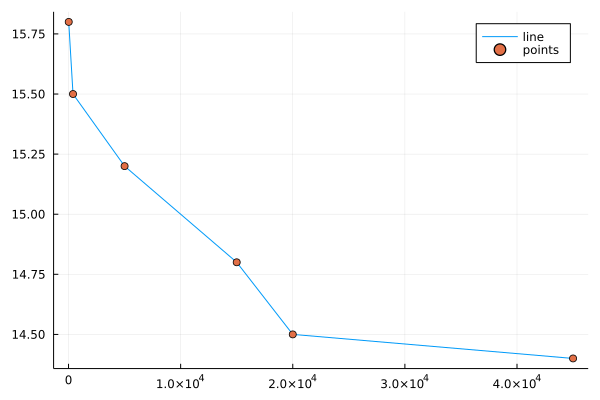

In [ ]:
plot(numpirates, globaltemperatures, label="line")  
scatter!(numpirates, globaltemperatures, label="points") 

The `!` at the end of the `scatter!` function name makes `scatter!` a mutating function, indicating that the scattered points will be added onto the pre-existing plot.

In contrast, see what happens when you replace `scatter!` in the above with the non-mutating function `scatter`.

Next, let's update this plot with the `xlabel!`, `ylabel!`, and `title!` commands to add more information to our plot.

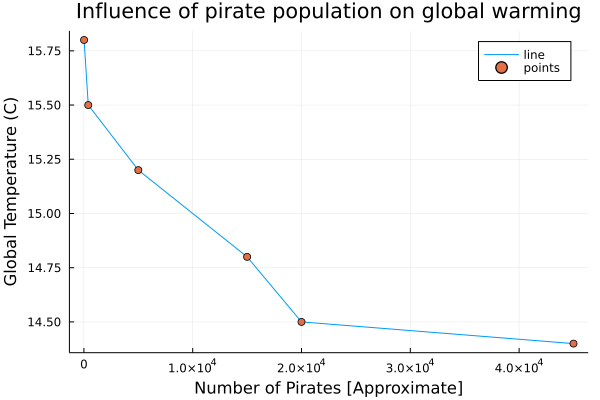

In [ ]:
xlabel!("Number of Pirates [Approximate]")
ylabel!("Global Temperature (C)")
title!("Influence of pirate population on global warming")

This still doesn't look quite right. The number of pirates has decreased since 1860, so reading the plot from left to right is like looking backwards in time rather than forwards. Let's flip the x axis to better see how pirate populations have caused global temperatures to change over time!

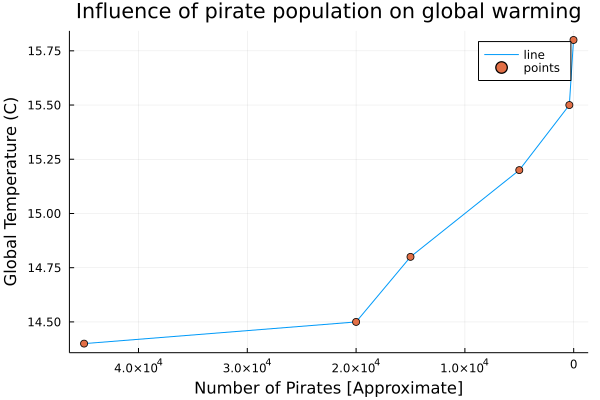

In [ ]:
xflip!()

And there we have it!

Note: We've had some confusion about this exercise. :) This is a joke about how people often conflate correlation and causation.

**Without changing syntax, we can create this plot with the UnicodePlots backend**

In [ ]:
Pkg.add("UnicodePlots")
unicodeplots()

   Resolving package versions...
   Installed Crayons ────── v4.0.4
   Installed UnicodePlots ─ v2.4.6
    Updating `~/.julia/environments/v1.6/Project.toml`
  [b8865327] + UnicodePlots v2.4.6
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [a8cc5b0e] + Crayons v4.0.4
  [b8865327] + UnicodePlots v2.4.6
Precompiling project...
  ✓ Crayons
  ✓ UnicodePlots
2 dependencies successfully precompiled in 4 seconds (130 already precompiled)


Plots.UnicodePlotsBackend()

In [ ]:
plot(numpirates, globaltemperatures, label="line")  
scatter!(numpirates, globaltemperatures, label="points") 
xlabel!("Number of Pirates [Approximate]")
ylabel!("Global Temperature (C)")
title!("Influence of pirate population on global warming")

                           Influence of pirate population on global warming       
                           +----------------------------------------+             
                    15.842 | ⚬                                      | line        
                           | |                                      | points      
                           | \                                      |             
                           | ⚬                                      |             
                           | |*.                                    |             
                           | | \.                                   |             
                           | |  "⚬.                                 |             
    Global Temperature (C) | |    "*.                               |             
                           | |      "*.                             |             
                           | |        "*.                           |             
    

And notice how this second plot differs from the first!  Using text like this is a little silly in a Jupyter notebook where we have fancy drawing capabilities, but it can be very useful for quick and dirty visualization in a terminal.

# Multiple dispatch

In this notebook we'll explore **multiple dispatch**, which is a key feature of Julia.

Multiple dispatch makes software *generic* and *fast*!

#### Starting with the familiar

To understand multiple dispatch in Julia, let's start with what we've already seen.

We can declare functions in Julia without giving Julia any information about the types of the input arguments that function will receive:

In [ ]:
f(x) = x^2

f (generic function with 1 method)

and then Julia will determine on its own which input argument types make sense and which do not:

In [ ]:
f(10)

100

In [ ]:
f([1, 2, 3])

LoadError: ignored

#### Specifying the types of our input arguments

However, we also have the *option* to tell Julia explicitly what types our input arguments are allowed to have.

For example, let's write a function `foo` that only takes strings as inputs.

In [ ]:
foo(x::String, y::String) = println("My inputs x and y are both strings!")

foo (generic function with 1 method)

We see here that in order to restrict the type of `x` and `y` to `String`s, we just follow the input argument name by a double colon and the keyword `String`.

Now we'll see that `foo` works on `String`s and doesn't work on other input argument types.

In [ ]:
foo("hello", "hi!")

My inputs x and y are both strings!


In [ ]:
foo(3, 4)

LoadError: ignored

To get `foo` to work on integer (`Int`) inputs, let's tack `::Int` onto our input arguments when we declare `foo`.

In [ ]:
foo(x::Int, y::Int) = println("My inputs x and y are both integers!")

foo (generic function with 2 methods)

In [ ]:
foo(3, 4)

My inputs x and y are both integers!


Now `foo` works on integers! But look, `foo` also still works when `x` and `y` are strings!

In [ ]:
foo("hello", "hi!")

My inputs x and y are both strings!


This is starting to get to the heart of multiple dispatch. When we declared

```julia
foo(x::Int, y::Int) = println("My inputs x and y are both integers!")
```
we didn't overwrite or replace
```julia
foo(y::String, y::String)```

Instead, we just added an additional ***method*** to the ***generic function*** called `foo`.

A ***generic function*** is the abstract concept associated with a particular operation.

For example, the generic function `+` represents the concept of addition.

A ***method*** is a specific implementation of a generic function for *particular argument types*.

For example, `+` has methods that accept floating point numbers, integers, matrices, etc.

We can use the `methods` to see how many methods there are for `foo`.

In [ ]:
methods(foo)

# 2 methods for generic function "foo":
[1] foo(x::String, y::String) in Main at In[148]:1
[2] foo(x::Int64, y::Int64) in Main at In[151]:1

Aside: how many methods do you think there are for addition?

In [ ]:
methods(+)

# 243 methods for generic function "+":
[1] +(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} in Base at int.jl:87
[2] +(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigInt) in Base.GMP at gmp.jl:528
[3] +(c::Union{Int16, Int32, Int64, Int8}, x::BigInt) in Base.GMP at gmp.jl:534
[4] +(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigFloat) in Base.MPFR at mpfr.jl:376
[5] +(c::Union{Int16, Int32, Int64, Int8}, x::BigFloat) in Base.MPFR at mpfr.jl:384
[6] +(c::Union{Float16, Float32, Float64}, x::BigFloat) in Base.MPFR at mpfr.jl:392
[7] +(x::Union{Dates.CompoundPeriod, Dates.Period}) in Dates at /usr/local/share/julia/stdlib/v1.6/Dates/src/periods.jl:362
[8] +(a::Union{LMS, XYZ}, b::Union{LMS, XYZ}) in Colors at /root/.julia/packages/Colors/yDxFN/src/algorithms.jl:4
[9] +(a::StaticArrays.StaticMatrix{N, M, T} where {N, M, T}, b::LinearAlgebra.UniformScaling) in StaticArrays at /root/.julia/packages/StaticArrays/OWJK7/src/linalg.jl:29
[10] +(a::StaticArrays.StaticArray) in StaticArrays at /root/.julia/packages/StaticArrays/OWJK7/src/linalg.jl:7
[11] +(a::StaticArrays.StaticArray, b::StaticArrays.StaticArray) in StaticArrays at /root/.julia/packages/StaticArrays/OWJK7/src/linalg.jl:12
[12] +(a::StaticArrays.StaticArray, b::AbstractArray) in StaticArrays at /root/.julia/packages/StaticArrays/OWJK7/src/linalg.jl:14
[13] +(index1::CartesianIndex{N}, index2::CartesianIndex{N}) where N in Base.IteratorsMD at multidimensional.jl:114
[14] +(a::Tuple{Vararg{Measures.Measure, N}}, b::Tuple{Vararg{Measures.Measure, N}}) where N in Measures at /root/.julia/packages/Measures/0Zkai/src/point.jl:21
[15] +(a::Tuple{Vararg{Measures.Measure, N}} where N, b::Tuple{Vararg{Measures.Measure, N}} where N) in Measures at /root/.julia/packages/Measures/0Zkai/src/point.jl:15
[16] +(a::ChainRulesCore.Tangent{P, T} where T, b::ChainRulesCore.Tangent{P, T} where T) where P in ChainRulesCore at /root/.julia/packages/ChainRulesCore/Y1Mee/src/tangent_arithmetic.jl:128
[17] +(a::ChainRulesCore.Tangent, b::ChainRulesCore.AbstractThunk) in ChainRulesCore at /root/.julia/packages/ChainRulesCore/Y1Mee/src/tangent_arithmetic.jl:122
[18] +(a::ChainRulesCore.Tangent, ::ChainRulesCore.ZeroTangent) in ChainRulesCore at /root/.julia/packages/ChainRulesCore/Y1Mee/src/tangent_arithmetic.jl:99
[19] +(a::ChainRulesCore.Tangent, ::ChainRulesCore.NoTangent) in ChainRulesCore at /root/.julia/packages/ChainRulesCore/Y1Mee/src/tangent_arithmetic.jl:59
[20] +(::ChainRulesCore.Tangent, x::ChainRulesCore.NotImplemented) in ChainRulesCore at /root/.julia/packages/ChainRulesCore/Y1Mee/src/tangent_arithmetic.jl:25
[21] +(a::ChainRulesCore.Tangent{P, T} where T, b::P) where P in ChainRulesCore at /root/.julia/packages/ChainRulesCore/Y1Mee/src/tangent_arithmetic.jl:145
[22] +(A::SparseArrays.AbstractSparseMatrix{Tv, Ti} where {Tv, Ti}, B::LinearAlgebra.Hermitian{var"#s832", var"#s831"} where {var"#s832", var"#s831"<:(SparseArrays.AbstractSparseMatrix{Tv, Ti} where {Tv, Ti})}) in SparseArrays at /usr/local/share/julia/stdlib/v1.6/SparseArrays/src/linalg.jl:14
[23] +(A::SparseArrays.AbstractSparseMatrix{Tv, Ti} where {Tv, Ti}, B::LinearAlgebra.Hermitian) in SparseArrays at /usr/local/share/julia/stdlib/v1.6/SparseArrays/src/linalg.jl:17
[24] +(A::SparseArrays.AbstractSparseMatrix{Tv, Ti} where {Tv, Ti}, B::LinearAlgebra.Symmetric{var"#s832", var"#s831"} where {var"#s832", var"#s831"<:(SparseArrays.AbstractSparseMatrix{Tv, Ti} where {Tv, Ti})}) in SparseArrays at /usr/local/share/julia/stdlib/v1.6/SparseArrays/src/linalg.jl:14
[25] +(A::SparseArrays.AbstractSparseMatrix{Tv, Ti} where {Tv, Ti}, B::LinearAlgebra.Symmetric) in SparseArrays at /usr/local/share/julia/stdlib/v1.6/SparseArrays/src/linalg.jl:17
[26] +(Da::LinearAlgebra.Diagonal, Db::LinearAlgebra.Diagonal) in LinearAlgebra at /usr/local/share/julia/stdlib/v1.6/LinearAlgebra/src/diagonal.jl:156
[27] +(D::LinearAlgebra.Diagonal, S::LinearAlgebra.Symmetric) in LinearAlgebra at /usr/lo

So, we now can call `foo` on integers or strings. When you call `foo` on a particular set of arguments, Julia will infer the types of the inputs and dispatch the appropriate method. *This* is multiple dispatch.

Multiple dispatch makes our code generic and fast. Our code can be generic and flexible because we can write code in terms of abstract operations such as addition and multiplication, rather than in terms of specific implementations. At the same time, our code runs quickly because Julia is able to call efficient methods for the relevant types.

To see which method is being dispatched when we call a generic function, we can use the @which macro:

In [ ]:
@which foo(3, 4)

foo(x::Int64, y::Int64) in Main at In[151]:1

Let's see what happens when we use `@which` with the addition operator!

In [ ]:
@which 3.0 + 3.0

+(x::Float64, y::Float64) in Base at float.jl:326

And we can continue to add other methods to our generic function `foo`. Let's add one that takes the ***abstract type*** `Number`, which includes subtypes such as `Int`, `Float64`, and other objects you would think of as numbers:

In [ ]:
foo(x::Number, y::Number) = println("My inputs x and y are both numbers!")

foo (generic function with 3 methods)

This method for `foo` will work on, for example, floating point numbers:

In [ ]:
foo(3.0, 4.0)

My inputs x and y are both numbers!


We can also add a fallback, duck-typed method for `foo` that takes inputs of any type:

In [ ]:
foo(x, y) = println("I accept inputs of any type!")

foo (generic function with 4 methods)

Given the methods we've already written for `foo` so far, this method will be called whenever we pass non-numbers to `foo`:

In [ ]:
v = rand(3)
foo(v, v)

I accept inputs of any type!


In [ ]:
foo(true,false)

My inputs x and y are both numbers!
